Bài 1: (5 điểm)
Giải quyết một bài toán phân loại (classification) trong học máy với các yêu cầu sau: 
- Tự đặt ra hoặc tự tìm Bài toán với dữ liệu có sẵn hoặc dữ liệu tự xây dựng. Dữ liệu phải
là dạng có cấu trúc, tức là dạng bảng biểu với cột là thuộc tính (attribute) và mỗi dòng là
một đối tượng (instance).
Dữ liệu phong phú với nhiều thuộc tính, các thuộc tính thuộc nhiều kiểu data khác nhau
(numerical, categorical). Số lượng các phần tử (các dòng) càng nhiều càng tốt.
- Thực hiện các bước đọc dữ liệu, chuẩn hoá dữ liệu trước khi đưa vào mô hình để học.
- Sử dụng ít nhất 3 mô hình phân loại khác nhau. So sánh các mô hình này với các độ đo:
accuracy, precision, recall, f1-score của từng class và weighted average of f1-score của
toàn bộ dữ liệu. So sánh về thời gian training và thời gian testing của các models này.

### **Mô Tả Dữ Liệu**
Dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp của một tổ chức ngân hàng Bồ Đào Nha. Các chiến dịch tiếp thị dựa trên các cuộc gọi điện thoại. Thông thường, cần có nhiều liên hệ với cùng một khách hàng, để truy cập xem sản phẩm (tiền gửi có kỳ hạn ngân hàng) sẽ được ('có') hay không ('không') được đăng ký.

Có bốn tập dữ liệu:

1) ngân hàng-bổ sung-đầy đủ.csv với tất cả các ví dụ (41188) và 20 đầu vào, được sắp xếp theo ngày (từ tháng 5 năm 2008 đến tháng 11 năm 2010), rất gần với dữ liệu được phân tích trong [Moro và cộng sự, 2014]
2) ngân hàng bổ sung.csv với 10% trong số các ví dụ (4119), được chọn ngẫu nhiên từ 1) và 20 đầu vào.
3) bank-full.csv với tất cả các ví dụ và 17 đầu vào, được sắp xếp theo ngày (phiên bản cũ hơn của tập dữ liệu này với ít đầu vào hơn).
4) bank.csv với 10% ví dụ và 17 đầu vào, được chọn ngẫu nhiên từ 3 (phiên bản cũ hơn của tập dữ liệu này với ít đầu vào hơn).
Các bộ dữ liệu nhỏ nhất được cung cấp để kiểm tra các thuật toán máy học đòi hỏi tính toán nhiều hơn (ví dụ: SVM).

Mục tiêu phân loại là dự đoán liệu khách hàng có đăng ký (có / không) một khoản tiền gửi có kỳ hạn (biến y) hay không.

Input variables:
# bank client data:
1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [ ]:
import pandas as pd 

# **Đọc dữ liệu Và tiền xử lí dữ liệu**

In [ ]:
# 1.1 read data 
filename = '/content/bank-full.csv'
df = pd.read_csv(filename,sep = ";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
print("DataFrame have",df.shape[1],"Columns and,",df.shape[0],"Rows")


DataFrame have 17 Columns and, 45211 Rows


In [ ]:
names = list(df.columns)
print("List name Columns:")
for i in names:
  print("*  ",i)

List name Columns:
*   age
*   job
*   marital
*   education
*   default
*   balance
*   housing
*   loan
*   contact
*   day
*   month
*   duration
*   campaign
*   pdays
*   previous
*   poutcome
*   y


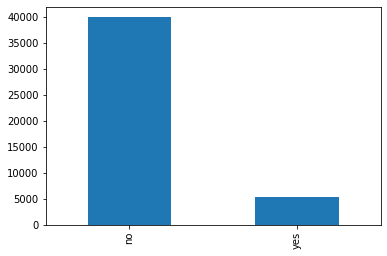

In [ ]:
g = df[names[-1]].value_counts()
g.plot.bar()

In [ ]:
types = df.dtypes
print(types)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


Chuẩn hóa dữ liệu

In [ ]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])

In [ ]:
data = df.values
print(data[:2])

[[  58    4    1    2    0 2143    1    0    2    5    8  261    1   -1
     0    3    0]
 [  44    9    2    1    0   29    1    0    2    5    8  151    1   -1
     0    3    0]]


In [ ]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

(45211, 16)
(45211,)
[0.51948052 0.36363636 0.5        0.66666667 0.         0.09225936
 1.         0.         1.         0.13333333 0.72727273 0.05307035
 0.         0.         0.         1.        ]


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.51948052 0.36363636 0.5        0.66666667 0.         0.09225936
 1.         0.         1.         0.13333333 0.72727273 0.05307035
 0.         0.         0.         1.        ]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42,
                                                    test_size=0.25)

# **Các thông số để so sánh**

In [ ]:
timesTraining =[0,0,0]
timesTesting = [0,0,0]
precision = [0,0,0]
recall = [0,0,0]
f1_score = [0,0,0]


# **Mô Hình kNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time 
start = time.time()
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)
stop = time.time()
timesTraining[0]= (stop - start)
print(f"Training time: {stop - start}s")

Training time: 0.0047681331634521484s


In [ ]:
# prediction 
y_predict = kNN.predict(X_test)
start = time.time()
error = 0
i= 0
for i in range(len(X_test)):
  # print(y_test[i],y_predict[i])
  if y_test[i] != y_predict[i]:
    error += 1
stop = time.time()
print(f"Testing time: {stop - start}s")
timesTesting[0]= (stop - start)
print(f'Number of mislabeled points out of a total {i} points : {error}') 

Testing time: 0.00379180908203125s
Number of mislabeled points out of a total 11302 points : 1286


In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_predict))

report = classification_report(y_test, y_predict,output_dict=True)
precision[0] =report['1']['precision']
recall[0]=report['1']['recall']
f1_score[0] = report['1']['f1-score']

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9950
           1       0.55      0.26      0.36      1353

    accuracy                           0.89     11303
   macro avg       0.73      0.62      0.65     11303
weighted avg       0.86      0.89      0.87     11303



# **Mô hình decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time 

dt = DecisionTreeClassifier(max_depth= 5)
start = time.time()
dt.fit(X_train,y_train)
stop = time.time()
timesTraining[1]=(stop - start)
print(f"Training time: {stop - start}s")

Training time: 0.09731292724609375s


In [ ]:
y_predict = dt.predict(X_test)
start = time.time()
error = 0
i= 0
for i in range(len(X_test)):
  # print(y_test[i],y_predict[i])
  if y_test[i] != y_predict[i]:
    error += 1
stop = time.time()
print(f"Testing Time : {stop - start}s")
timesTesting[1] = (stop - start)

print(f'Number of mislabeled points out of a total {i} points : {error}') 

Testing Time : 0.006503105163574219s
Number of mislabeled points out of a total 11302 points : 1206


In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_predict))

report = classification_report(y_test, y_predict,output_dict=True)
precision[1] =report['1']['precision']
recall[1]=report['1']['recall']
f1_score[1] = report['1']['f1-score']

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      9950
           1       0.58      0.37      0.46      1353

    accuracy                           0.89     11303
   macro avg       0.75      0.67      0.70     11303
weighted avg       0.88      0.89      0.88     11303



# **Mô hình GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
import time 
start = time.time()
gnb = GaussianNB()
y_predict = gnb.fit(X_train, y_train).predict(X_test)
stop = time.time()
timesTraining[2]=(stop - start)
print(f"Training time: {stop - start}s")

Training time: 0.032433271408081055s


In [ ]:
# prediction 
start = time.time()
error = 0

i= 0
for i in range(len(X_test)):
  # print(y_test[i],y_predict[i])
  if y_test[i] != y_predict[i]:
    error += 1
print(f'Number of mislabeled points out of a total {i} points : {error}') 
stop = time.time()
timesTesting[2] = (stop - start)
print(f"Testing time: {stop - start}s")

Number of mislabeled points out of a total 11302 points : 1972
Testing time: 0.004271984100341797s


In [ ]:
from sklearn.metrics import classification_report
print( classification_report(y_test, y_predict))

report = classification_report(y_test, y_predict,output_dict=True)
precision[2] =report['1']['precision']
recall[2]=report['1']['recall']
f1_score[2] = report['1']['f1-score']

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      9950
           1       0.34      0.48      0.40      1353

    accuracy                           0.83     11303
   macro avg       0.63      0.68      0.65     11303
weighted avg       0.86      0.83      0.84     11303



# **So sánh các thông số**

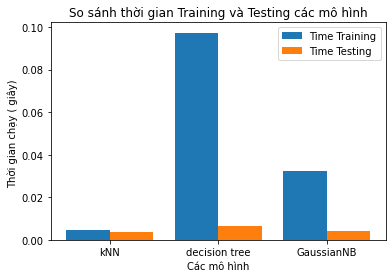

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['kNN','decision tree','GaussianNB']

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, timesTraining, 0.4, label = 'Time Training')
plt.bar(X_axis + 0.2, timesTesting, 0.4, label = 'Time Testing')
  
plt.xticks(X_axis, X)
plt.xlabel("Các mô hình")
plt.ylabel("Thời gian chạy ( giây) ")
plt.title("So sánh thời gian Training và Testing các mô hình")
plt.legend()
plt.show()





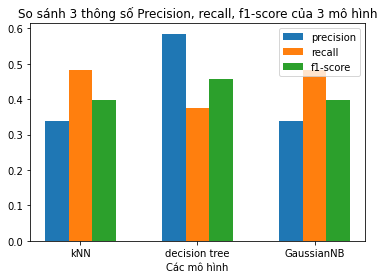

In [ ]:
X = ['kNN','decision tree','GaussianNB']
X_axis = np.arange(len(X))
plt.bar(X_axis -0.2, precision, 0.2, label = 'precision')
plt.bar(X_axis + 0, recall, 0.2, label = 'recall')
plt.bar(X_axis + 0.2, f1_score, 0.2, label = 'f1-score')
plt.xticks(X_axis, X)
plt.xlabel("Các mô hình")
plt.ylabel("")
plt.title("So sánh 3 thông số Precision, recall, f1-score của 3 mô hình")
plt.legend()
plt.show()
